In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas_datareader.data import DataReader

In [4]:
from datetime import datetime

In [5]:
from __future__ import division

In [6]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [7]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [8]:
for stock in tech_list:

    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [9]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-08,203.529999,199.389999,200.199997,203.429993,27009500.0,200.668991
2019-08-09,202.759995,199.289993,201.300003,200.990005,24619700.0,199.015396
2019-08-12,202.050003,199.149994,199.619995,200.479996,22474900.0,198.510406
2019-08-13,212.139999,200.479996,201.020004,208.970001,47218500.0,206.917007
2019-08-14,206.440002,202.589996,203.160004,202.750000,36547400.0,200.758102


In [10]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,290.515257,283.613992,286.638379,287.456284,3.578528e+07,285.941144
std,55.774427,54.313082,54.935445,55.223733,1.721839e+07,55.661660
min,202.050003,199.149994,199.619995,200.479996,1.165440e+07,198.510406
25%,249.250000,241.210007,246.500000,244.929993,2.441360e+07,243.829147
50%,284.540009,278.200012,280.529999,282.799988,3.113050e+07,281.528931
75%,322.350006,316.500000,318.660004,319.000000,4.158710e+07,317.677216
max,457.649994,441.170013,452.820007,455.609985,1.067212e+08,454.790009


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-08-08 to 2020-08-07
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


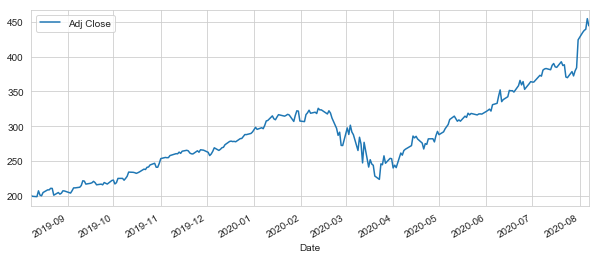

In [12]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4)) 

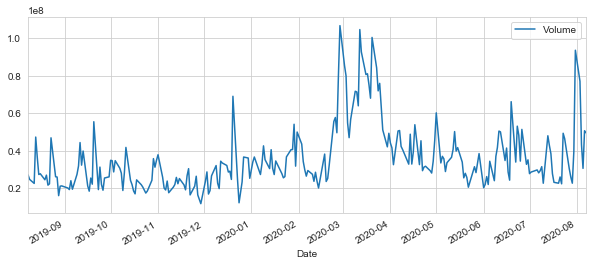

In [13]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [14]:
ma_day = [10,20,50]

for ma in ma_day:
    
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.Series(AAPL['Adj Close']).rolling(window=ma).mean()

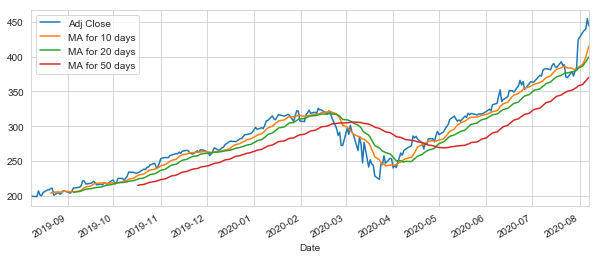

In [15]:
AAPL[['Adj Close','MA for 10 days', 'MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

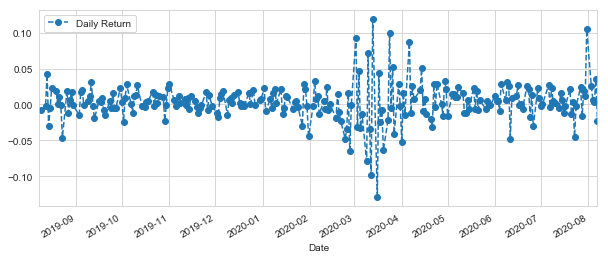

In [16]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

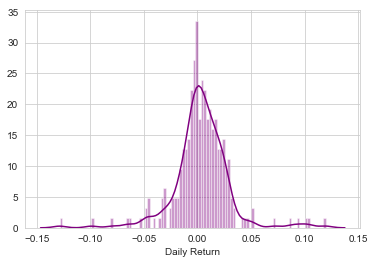

In [17]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'purple')

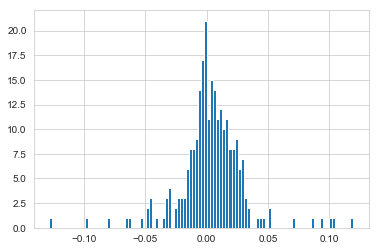

In [18]:
AAPL['Daily Return'].hist(bins=100)

In [19]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [20]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-08-08,200.668991,1832.890015,1204.800049,137.201691
2019-08-09,199.015396,1807.579956,1188.010010,136.036041
2019-08-12,198.510406,1784.920044,1174.709961,134.139359
2019-08-13,206.917007,1824.339966,1197.270020,136.915222
2019-08-14,200.758102,1762.959961,1164.290039,132.792084


In [21]:
tech_rets = closing_df.pct_change()

In [22]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-08-08,NaN,NaN,NaN,NaN
2019-08-09,-0.008240,-0.013809,-0.013936,-0.008496
2019-08-12,-0.002537,-0.012536,-0.011195,-0.013943
2019-08-13,0.042348,0.022085,0.019205,0.020694
2019-08-14,-0.029765,-0.033645,-0.027546,-0.030115


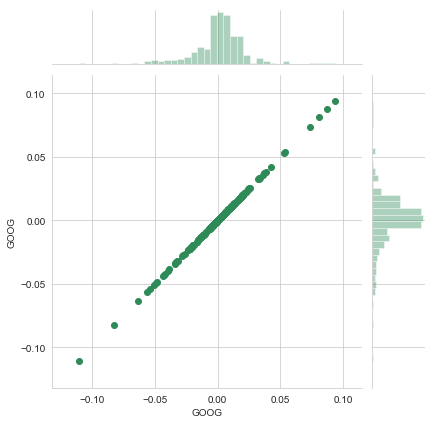

In [23]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

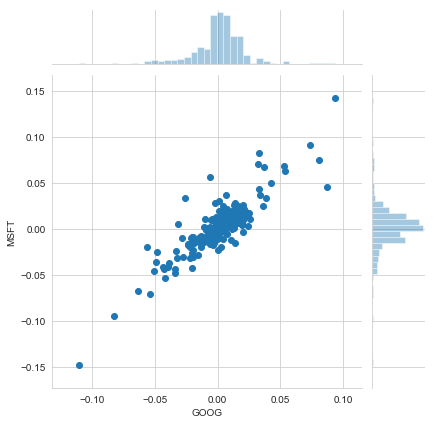

In [24]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

In [25]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-08-08,NaN,NaN,NaN,NaN
2019-08-09,-0.008240,-0.013809,-0.013936,-0.008496
2019-08-12,-0.002537,-0.012536,-0.011195,-0.013943
2019-08-13,0.042348,0.022085,0.019205,0.020694
2019-08-14,-0.029765,-0.033645,-0.027546,-0.030115


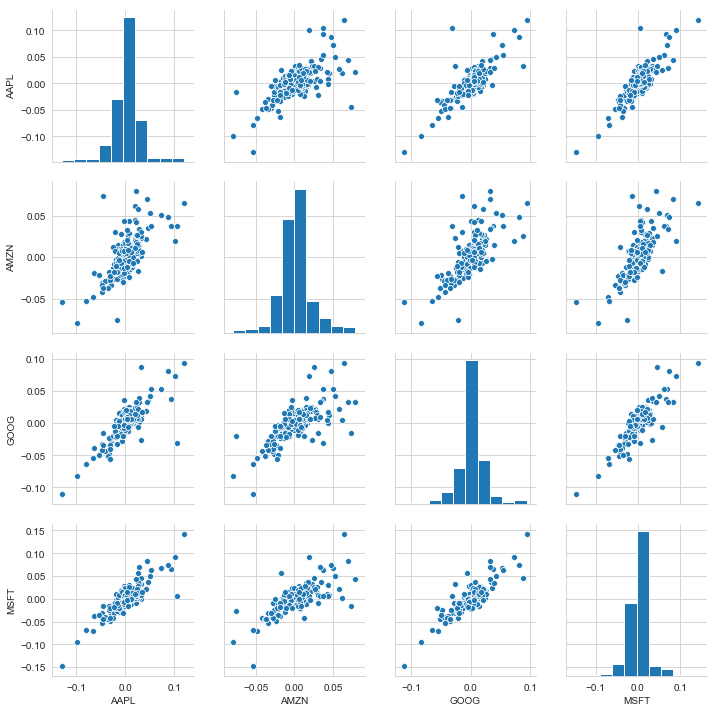

In [26]:
sns.pairplot(tech_rets.dropna())

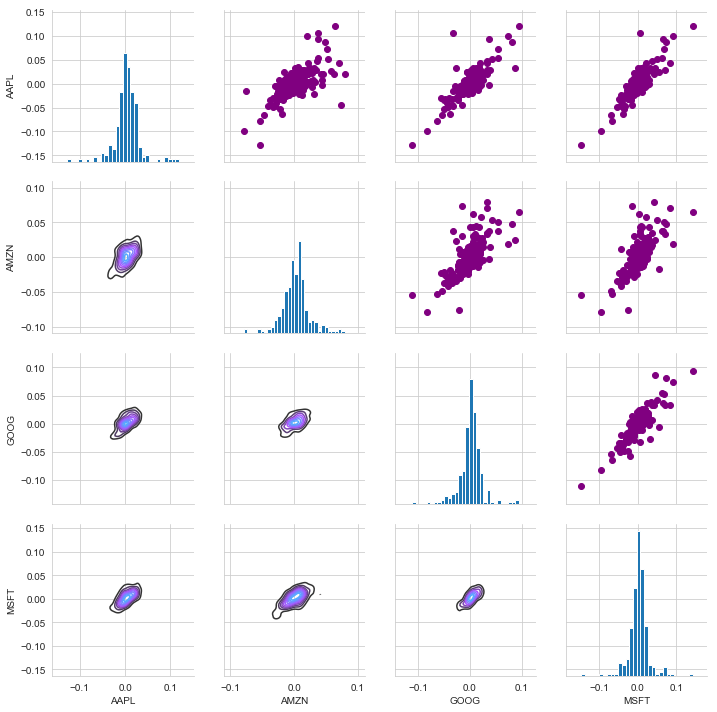

In [27]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

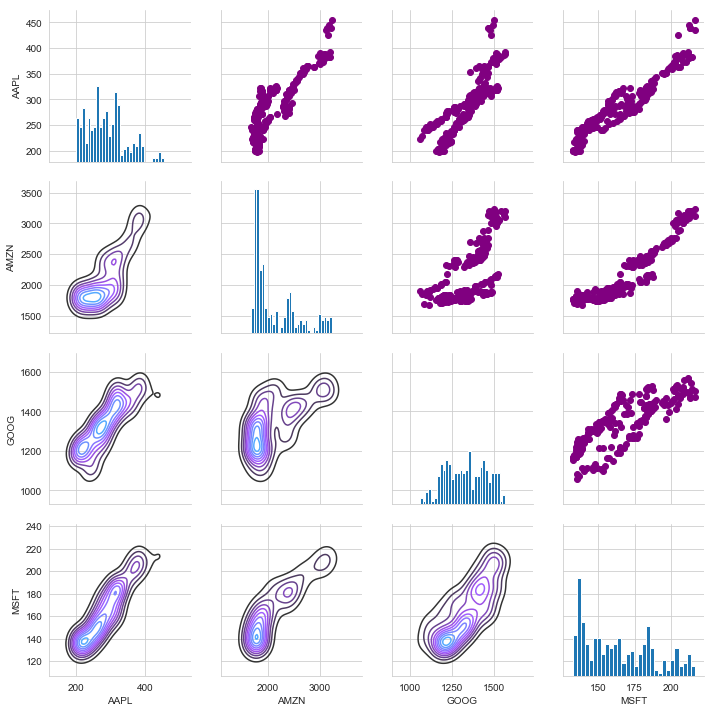

In [28]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

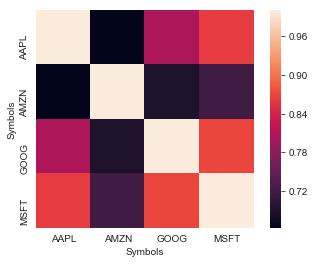

In [29]:
sns.heatmap(tech_rets.dropna().corr(),square=True)

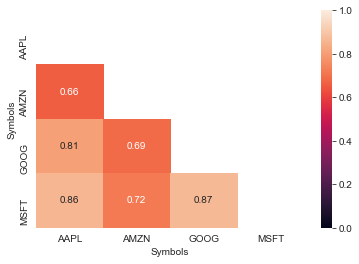

In [30]:
corr = tech_rets.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmin=0, vmax=1,annot=True)

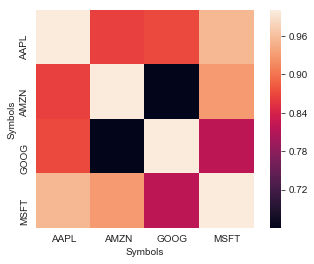

In [31]:
sns.heatmap(closing_df.corr(),square=True)

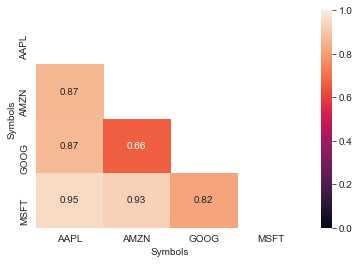

In [32]:
corr = closing_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmin=0, vmax=1,annot=True)

In [33]:
#Risk Analysis
rets = tech_rets.dropna()

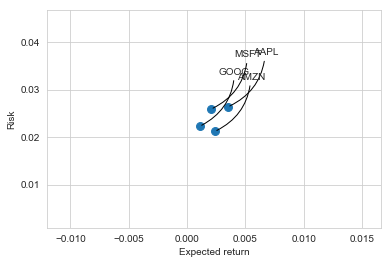

In [34]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
    label,
    xy= (x, y), xytext = (50,50),
    textcoords = 'offset points', ha = 'right', va= 'bottom',
    arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3',color='black'))

In [35]:
#value at risk
#Bootstrap Method

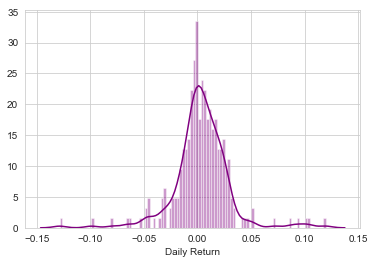

In [36]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'purple')

In [37]:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-08-09,-0.008240,-0.013809,-0.013936,-0.008496
2019-08-12,-0.002537,-0.012536,-0.011195,-0.013943
2019-08-13,0.042348,0.022085,0.019205,0.020694
2019-08-14,-0.029765,-0.033645,-0.027546,-0.030115
2019-08-15,-0.004981,0.007465,0.002551,-0.002239


In [38]:
rets['AAPL'].quantile(0.05)

-0.03425842644096377

In [39]:
#Value at risk
#Monte Carlo Method

In [40]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [41]:
def stock_monte_carlo(start_price, days, mu, sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    
    for x in xrange(1, days):
        
        shock[x] = np.random.normal(loc=mu*dt,scale = sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x]=price[x-1]+(price[x-1] * (drift[x]+shock[x]))
        
    return price    
    

In [42]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-08,1205.010010,1173.020020,1182.829956,1204.800049,1468000,1204.800049
2019-08-09,1203.880005,1183.603027,1197.989990,1188.010010,1065700,1188.010010
2019-08-12,1184.959961,1167.671997,1179.209961,1174.709961,1003000,1174.709961
2019-08-13,1204.780029,1171.459961,1171.459961,1197.270020,1294400,1197.270020
2019-08-14,1182.300049,1160.540039,1176.310059,1164.290039,1578700,1164.290039


Text(0.5,1,'Monte Carlo Analysis for Google')

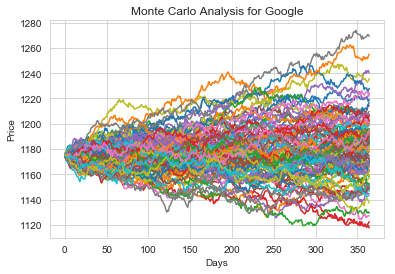

In [44]:
start_price = 1175.040039

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')


In [45]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

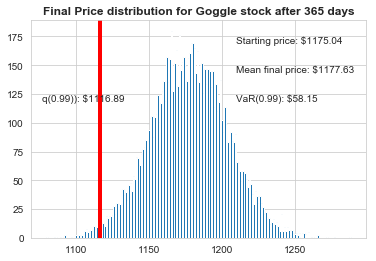

In [46]:
q = np.percentile(simulations,1)

plt.hist(simulations, bins = 200)

#Starting Price
plt.figtext(0.6,0.8, s="Starting price: $%.2f" %start_price)

#Mean ending Price
plt.figtext(0.6,0.7, "Mean final price: $%.2f" %simulations.mean())

#Variance of the Price (within 99% confidence interval)
plt.figtext(0.6,0.6, "VaR(0.99): $%.2f" %(start_price - q))

#Display 1% quantile
plt.figtext(0.15,0.6, "q(0.99)): $%.2f" %q)

#Plot a line at 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

#Title
plt.title(u"Final Price distribution for Goggle stock after %s days" %days, weight= 'bold');